# Projeto de Análise de Dados



### O que temos?

Temos os dados de 2019 de uma empresa de prestação de serviços. 

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados

Obs1: Para ler arquivos csv, temos o read_csv<br>
Obs2: Para ler arquivos xlsx (arquivos em excel normais, que não são padrão csv), temos o read_excel

### O que queremos saber/fazer?

1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa? <br>
    Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários
    
    
2. Qual foi o faturamento da empresa?<br>
    Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos
    
    
3. Qual o % de funcionários que já fechou algum contrato?<br>
    Sugestão: na base de serviços temos o funcionário que fechou cada serviço. Mas nem todos os funcionários que a empresa tem já fecharam algum serviço.<br>
    . Na base de funcionários temos uma lista com todos os funcionários<br>
    . Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais<br>
    . Para calcular a qtde de funcionários que fecharam algum serviço, use a base de serviços e conte quantos funcionários tem ali. Mas lembre-se, cada funcionário só pode ser contado uma única vez.<br><br>
    Dica: se você aplicar o método .unique() em uma variável que é apenas 1 coluna de um dataframe, ele vai excluir todos os valores duplicados daquela coluna.<br>
    Ex: unicos_colunaA = dataframe['colunaA'].unique() te dá como resposta uma lista com todos os itens da colunaA aparecendo uma única vez. Todos os valores repetidos da colunaA são excluidos da variável unicos_colunaA 
    
    
4. Calcule o total de contratos que cada área da empresa já fechou


5. Calcule o total de funcionários por área


6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?<br>
    Dica: .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()

Obs: Lembrando as opções mais usuais de encoding:<br>
encoding='latin1', encoding='ISO-8859-1', encoding='utf-8' ou então encoding='cp1252'

Observação Importante: Se o seu código der um erro na hora de importar os arquivos:<br>
- CadastroClientes.csv
- CadastroFuncionarios.csv

Use separador ";" (ponto e vírgula) para resolver e inclua o parâmetro decimal ',' para o pandas identificar os números corretamente

### Importação de módulos e arquivos

In [1]:
import pandas as pd
# decimal -> pandas ler a vígula como separador decimal. Substituindo-a, No DF, pelo . ponto
#tratamos a vírgula como ponto, para o pandas ser capaz e realizar operações matemáticas


funcionarios_df = pd.read_csv('./CadastroFuncionarios.csv', sep=';', decimal=',')
clientes_df = pd.read_csv('./CadastroClientes.csv', sep=';', decimal=',')
servicos_df = pd.read_excel('./BaseServiçosPrestados.xlsx')

# retirar colunas desnecessárias para o exercício (Cargo, estado civíl), axis=1 -> colunas
funcionarios_df= funcionarios_df.drop(['Estado Civil', 'Cargo'], axis=1)

display(funcionarios_df)
display(clientes_df)
display(servicos_df)


,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo
...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Logística
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Administrativo
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


## 1 - Folha salarial

### passo 1: importar módulos todas as bases

In [2]:
clientes_df


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


In [3]:
servicos_df

,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


In [4]:
# 1- Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa?
#Sugestão: calcule o salário total de cada funcionário, salário + benefícios + impostos, depois some todos os salários

#passo 1: criar coluna com o salario total gasto pela empresa
# nessa coluna cada linha receberá o somatório dos valores das colunas anteriormente definidas.
funcionarios_df['Salário Total']=funcionarios_df['Salario Base']+funcionarios_df['Impostos']+funcionarios_df['Beneficios']+funcionarios_df['VT']+funcionarios_df['VR']

# a folha salarial será o somatório de todos os valores da coluna 'Salario Total'
folha_salarial=sum(funcionarios_df['Salário Total'])# df.sum() tbm serve
print(f'A folha salarial da empresa é de R${folha_salarial:,.2f}') # format para a ',' separar o milhar


A folha salarial da empresa é de R$2,717,493.22


## 2- Faturamento da empresa

In [5]:
# Qual foi o faturamento da empresa?
# Sugestão: calcule o faturamento total de cada serviço e depois some o faturamento de todos
# a tabela clientes não se repete -> tabela caracteristica
# a de serviços/contratos (acontecimentos) sim. -> tabela fato
# sempre pegaremos da tabela caracteristica e jogaremos na tabela fato
#abaixo cria-se df com a tabela fato serviço(ID,Tempo total) recebendo a tabela característica clientes(ID, Valor contrato mensal), cujo ID cliente é o elo (FK)
faturamento_df= servicos_df[['ID Cliente','Tempo Total de Contrato (Meses)']].merge(clientes_df[['ID Cliente','Valor Contrato Mensal']], on='ID Cliente')
# cria-se nova coluna Faturamento do cliente com a multiplicação linha por linha das duas colunas abaixo
faturamento_df['Faturamento do Cliente']=faturamento_df['Tempo Total de Contrato (Meses)']*faturamento_df['Valor Contrato Mensal']
# faturamento empresa recebe o somatório de todos os valores da coluna
faturamento_empresa = faturamento_df['Faturamento do Cliente'].sum()

print(f'O faturamento da empresa é de R$ {faturamento_empresa:,.2f}')


O faturamento da empresa é de R$ 5,519,160.00


## 3 - % Funcionários Fecharam Contrato

In [6]:
#Qual o % de funcionários que já fechou algum contrato?
#Sugestão: na base de serviços temos o funcionário que fechou cada serviço. 
#Mas nem todos os funcionários que a empresa tem já fecharam algum serviço.
#. Na base de funcionários temos uma lista com todos os funcionários
#. Queremos calcular Qtde_Funcionarios_Fecharam_Serviço / Qtde_Funcionários_Totais
#. Para calcular a qtde de funcionários que fecharam algum serviço, use a base de serviços e conte quantos 
#funcionários tem ali. Mas lembre-se, cada funcionário só pode ser contado uma única vez.

# tabela característica -> Funcionários
total_funcionarios=len(funcionarios_df['ID Funcionário'])
# tabela fato -> Servicos
ja_vendeu=len(set(servicos_df['ID Funcionário']))
# outra forma de remover duplicatas seria:
# ja_vendeu= len(servicos_df['ID Funcionário'].unique())

#tabela fato recebe a tabela característica
print(total_funcionarios)
print(ja_vendeu)

print(f'Do total de {total_funcionarios} funcionários da empresa, {ja_vendeu} já fecharam contrato alguma vez.\nLogo, {ja_vendeu/total_funcionarios:.2%} dos funcionários já fecharam contrato alguma vez.')



114
99
Do total de 114 funcionários da empresa, 99 já fecharam contrato alguma vez.
Logo, 86.84% dos funcionários já fecharam contrato alguma vez.


## 4 - qtde de contratos por área

In [15]:
#4. Calcule o total de contratos que cada área da empresa já fechou
# value_counts()  # conta quantas vezes um valor aparece
# tabela fato -> servicos(id funcionario)
# tabela característica -> funcionarios (id funcionario, área)

#tabela fato recebe a tabela característica

contratos_por_area_df=servicos_df[['ID Funcionário']].merge(funcionarios_df[['ID Funcionário', 'Area']], on='ID Funcionário')
#display(servicos_df)
#display(contratos_por_area_df)

# 
contratos_area_qtd=contratos_por_area_df['Area'].value_counts()
print(contratos_area_qtd)


Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: Area, dtype: int64


## 5 - funcionários por área

Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: Area, dtype: int64


<AxesSubplot: >

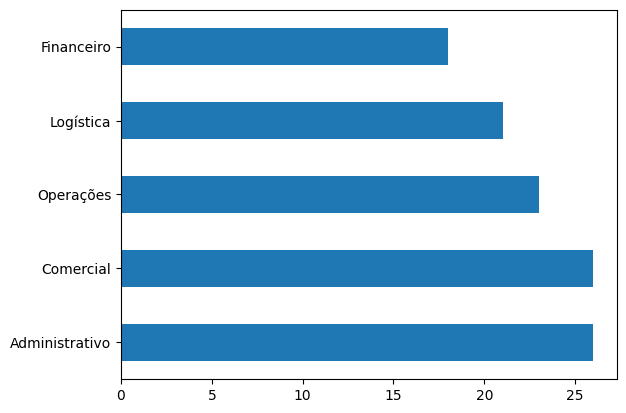

In [32]:
#5. Calcule o total de funcionários por área
func_por_area=funcionarios_df['Area'].value_counts()
print(func_por_area)
func_por_area.plot(kind='barh')

## 6 - Ticket médio mensal

In [34]:
#Qual o ticket médio mensal (faturamento médio mensal) dos contratos?
#Dica: .mean() calcula a média -> exemplo: media_colunaA = dataframe['colunaA'].mean()
#
media_mensal=clientes_df['Valor Contrato Mensal'].mean() 

print(f'O ticket médio mensal é de R$ {media_mensal:,.2f}')


O ticket médio mensal é de R$ 2,502.56
